In [14]:
# importing required libraries
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.decomposition import PCA # Needed for dimension reduction
#from sklearn.datasets import load_wine # Dataset that I will be using
import matplotlib.pyplot as plt # Plotting 
import pandas as pd # Storing data convenieniently
import numpy as np #Import Numpy
from sklearn.metrics import silhouette_score #Import Silhouette Score

In [15]:
# reading the data and looking at the first and last five rows of the data
File = 'Final_10Variables_Standardized.csv'
data_df = pd.read_csv(File, header=0)
data_df

,HDI,GE,EPI,BH,PAR,TBP,%RE,CO2/Capita,Solar,Wind
0,0.208,0.130,0.950,0.580,0.051,0.013,0.237,0.008,0.765,0.273
1,0.712,0.461,0.583,0.273,0.392,1.000,0.424,0.042,0.432,0.206
2,0.629,0.354,0.700,0.881,0.072,0.459,0.002,0.097,0.876,0.172
3,0.332,0.212,0.933,0.743,0.302,0.366,0.629,0.029,0.832,0.044
4,0.682,0.475,1.000,0.177,0.545,0.873,0.010,0.155,0.832,0.089
...,...,...,...,...,...,...,...,...,...,...
172,0.382,0.347,0.550,0.798,0.107,0.241,0.341,0.013,0.457,0.125
173,0.563,0.084,0.367,0.638,0.740,1.000,0.161,0.126,0.729,0.094
174,0.551,0.485,0.250,0.463,0.254,0.280,0.260,0.058,0.444,0.131
175,0.337,0.316,0.250,0.718,0.695,1.000,0.942,0.008,0.866,0.055


In [16]:
# statistics of the data
data_df.describe()

,HDI,GE,EPI,BH,PAR,TBP,%RE,CO2/Capita,Solar,Wind
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.585791,0.470763,0.401497,0.531294,0.318356,0.676362,0.351463,0.120011,0.587023,0.143367
std,0.263976,0.220186,0.259005,0.205173,0.214844,0.327747,0.300158,0.150864,0.254993,0.121381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.377000,0.315000,0.200000,0.382000,0.136000,0.438000,0.112000,0.018000,0.437000,0.065000
50%,0.618000,0.452000,0.367000,0.500000,0.299000,0.774000,0.260000,0.066000,0.651000,0.124000
75%,0.773000,0.593000,0.533000,0.678000,0.465000,0.990000,0.554000,0.161000,0.786000,0.190000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#Correlation Factor
correlation = data_df.corr()
correlation.style.background_gradient(cmap='coolwarm')


,HDI,GE,EPI,BH,PAR,TBP,%RE,CO2/Capita,Solar,Wind
HDI,1.000000,0.848888,-0.085808,-0.104754,0.160337,0.143406,-0.654520,0.583738,-0.583523,0.363687
GE,0.848888,1.000000,-0.078190,-0.071644,0.138893,0.210362,-0.448432,0.509161,-0.536025,0.336332
EPI,-0.085808,-0.078190,1.000000,0.091937,-0.079883,-0.062592,0.024132,-0.013651,-0.037207,0.061655
BH,-0.104754,-0.071644,0.091937,1.000000,-0.129741,-0.151451,0.085245,0.232182,0.190497,0.091751
PAR,0.160337,0.138893,-0.079883,-0.129741,1.000000,0.506317,0.096220,-0.045485,-0.157072,0.038765
TBP,0.143406,0.210362,-0.062592,-0.151451,0.506317,1.000000,0.135106,0.068953,-0.195440,-0.084322
%RE,-0.654520,-0.448432,0.024132,0.085245,0.096220,0.135106,1.000000,-0.509884,0.189926,-0.138851
CO2/Capita,0.583738,0.509161,-0.013651,0.232182,-0.045485,0.068953,-0.509884,1.000000,-0.187816,0.124042
Solar,-0.583523,-0.536025,-0.037207,0.190497,-0.157072,-0.195440,0.189926,-0.187816,1.000000,-0.199018
Wind,0.363687,0.336332,0.061655,0.091751,0.038765,-0.084322,-0.138851,0.124042,-0.199018,1.000000


In [18]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(data_df)

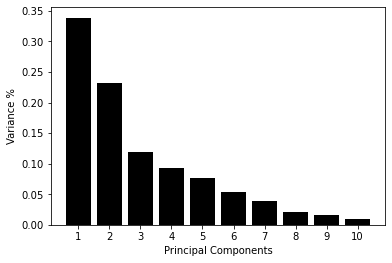

In [19]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='black')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)


In [20]:
#Calculating the variance for each PCA
pca.explained_variance_ratio_

array([0.33888305, 0.23195513, 0.1194745 , 0.09317308, 0.07727896,
       0.05309735, 0.0385974 , 0.02166875, 0.01628489, 0.00958688])

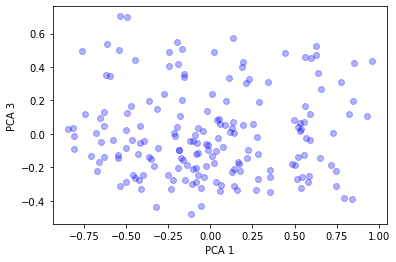

In [21]:
#Plotting the variance for each PCA
plt.scatter(PCA_components[0],PCA_components[2], alpha=.3, color='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 3')
plt.show()

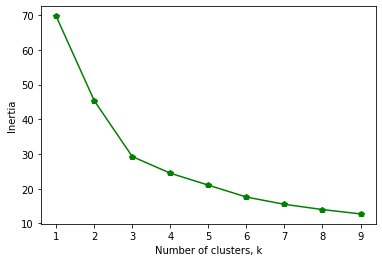

12.748356785720203

In [22]:
#Elbow Method and Inertia Value

inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k,n_init=1000)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
model.inertia_
    
plt.plot(range(1,10), inertias, '-p', color='green')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks()
plt.show()

model.inertia_

In [23]:
#Calculating the Silhouette Score
for n_clusters in range(2, 9):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(data_df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(data_df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.22444431677429763)
For n_clusters = 3, silhouette score is 0.24837540791427876)
For n_clusters = 4, silhouette score is 0.2156618440055591)
For n_clusters = 5, silhouette score is 0.18782523224708453)
For n_clusters = 6, silhouette score is 0.19194461849371192)
For n_clusters = 7, silhouette score is 0.18862767076144213)
For n_clusters = 8, silhouette score is 0.1658238292165285)


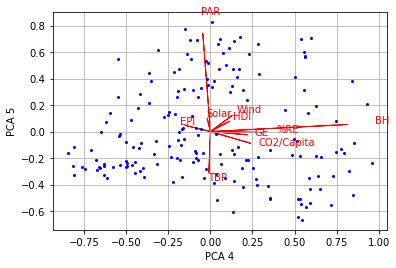

In [24]:
#plot biplots for PCA analysis
## project data into PC space

# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[4] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[5]

xs = pca.transform(data_df)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(data_df)[:,1]

plt.xlabel('PCA 4')
plt.ylabel('PCA 5')
## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(data_df.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i]*1, ys[i]*1, '')
    plt.plot(xs[i], ys[i], 'bo', markersize = 2)
    #plt.text(xs[i]*1.2, ys[i]*1.2, list(data_df.index)[i], color='b')
    
plt.grid()
plt.show()

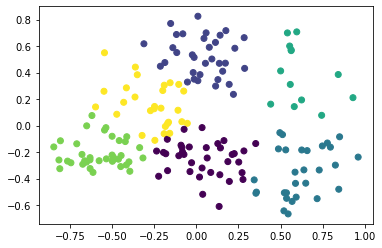

In [25]:
#k mean clustering
model = KMeans(n_clusters=6,n_init=1000)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

In [26]:
labels

array([3, 0, 1, 3, 5, 5, 5, 5, 4, 5, 4, 1, 0, 1, 5, 4, 0, 0, 0, 0, 1, 0,
       0, 4, 4, 2, 2, 1, 2, 2, 5, 2, 2, 5, 1, 0, 2, 0, 2, 4, 5, 4, 4, 4,
       3, 0, 0, 0, 1, 1, 0, 3, 4, 2, 1, 4, 4, 2, 3, 5, 4, 0, 4, 1, 0, 2,
       2, 0, 2, 0, 4, 0, 1, 0, 1, 1, 4, 5, 4, 0, 4, 1, 1, 2, 0, 5, 1, 0,
       4, 1, 3, 2, 4, 4, 3, 2, 4, 1, 2, 4, 1, 3, 1, 5, 1, 1, 5, 5, 0, 2,
       3, 0, 2, 4, 4, 0, 2, 2, 5, 4, 1, 3, 5, 3, 0, 0, 0, 4, 4, 5, 2, 4,
       5, 2, 5, 5, 1, 0, 1, 0, 5, 5, 2, 5, 4, 4, 3, 1, 4, 4, 0, 3, 0, 4,
       4, 0, 2, 5, 0, 2, 5, 4, 1, 1, 1, 2, 1, 5, 4, 5, 1, 1, 1, 0, 1, 2,
       2], dtype=int32)

In [27]:
data_df["cluster"]= model.labels_
data_df

,HDI,GE,EPI,BH,PAR,TBP,%RE,CO2/Capita,Solar,Wind,cluster
0,0.208,0.130,0.950,0.580,0.051,0.013,0.237,0.008,0.765,0.273,3
1,0.712,0.461,0.583,0.273,0.392,1.000,0.424,0.042,0.432,0.206,0
2,0.629,0.354,0.700,0.881,0.072,0.459,0.002,0.097,0.876,0.172,1
3,0.332,0.212,0.933,0.743,0.302,0.366,0.629,0.029,0.832,0.044,3
4,0.682,0.475,1.000,0.177,0.545,0.873,0.010,0.155,0.832,0.089,5
...,...,...,...,...,...,...,...,...,...,...,...
172,0.382,0.347,0.550,0.798,0.107,0.241,0.341,0.013,0.457,0.125,1
173,0.563,0.084,0.367,0.638,0.740,1.000,0.161,0.126,0.729,0.094,0
174,0.551,0.485,0.250,0.463,0.254,0.280,0.260,0.058,0.444,0.131,1
175,0.337,0.316,0.250,0.718,0.695,1.000,0.942,0.008,0.866,0.055,2


In [28]:
data_df["cluster"].value_counts()

4    37
0    36
1    34
2    29
5    28
3    13
Name: cluster, dtype: int64

In [29]:
data_df.to_csv("6Clusters_10FinalVariables.csv", index=False)

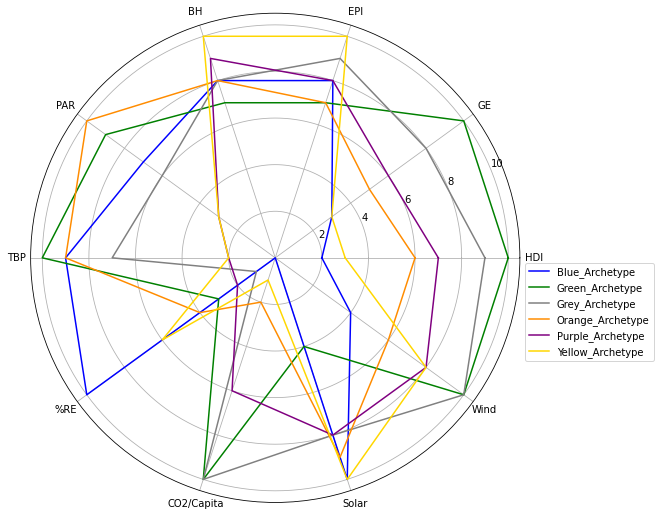

In [30]:
feature = ['HDI','GE','EPI', 'BH','PAR','TBP',
           '%RE', 'CO2/Capita','Solar', 'Wind']
#Blue_Archetype = [2,3,4,5,3,9,9,0,8,1,2]
#Green_Archetype = [9,7,3,4,4,10,2,2,2,2,9]
#Grey_Archetype = [7,5,4,5,2,6,1,1,6,1,7]
#Orange_Archetype = [6,4,4,5,5,10,4,0,7,1,6]
#Purple_Archetype = [6,4,4,6,1,2,1,1,7,1,6]
#Yellow_Archetype = [2,2,5,6,1,1,5,0,8,2,2]


Blue_Archetype = [2,3,8,8,7,9,10,0,10,4,2]
Green_Archetype = [10,10,7,7,9,10,3,10,4,10,10]
Grey_Archetype = [9,8,9,8,6,7,1,10,8,10,9]
Orange_Archetype = [6,5,7,8,10,9,4,2,9,6,6]
Purple_Archetype = [7,6,8,9,3,2,2,6,8,8,7]
Yellow_Archetype = [3,3,10,10,3,2,6,1,10,8,3]

cluster1 = [9,8,9,8,6,7,1,10,8,10,9]
cluster2 = [6,5,7,8,10,9,4,2,9,6,6]
cluster3 = [7,6,8,9,3,2,2,6,8,8,7]
cluster4 = [10,10,7,7,9,10,3,10,4,10,10]
cluster5 = [3,3,10,10,3,2,6,1,10,8,3]
cluster6 = [2,3,8,8,7,9,10,0,10,4,2]


# Initialise the spider plot by setting figure size and polar projection
plt.figure(figsize=(15, 9))
plt.subplot(polar=True)



theta = np.linspace(0, 2 * np.pi, len(cluster1))

#Arrange the grid into number of sales equal parts in degrees
lines, labels = plt.thetagrids(range(0, 360, int(360/len(feature))), (feature))
 
# Plot 2nd cluster graph
plt.plot(theta, Blue_Archetype,'blue')   
 
# Plot 1st cluster graph
plt.plot(theta, Green_Archetype,'green')
 
    # Plot 1st cluster graph
plt.plot(theta, Grey_Archetype,'grey')
 
# Plot 2nd cluster graph
plt.plot(theta, Orange_Archetype,'darkorange')

# Plot 2nd cluster graph
plt.plot(theta, Purple_Archetype,'purple')

# Plot 2nd cluster graph
plt.plot(theta, Yellow_Archetype,'gold')

 

# Add legend and title for the plot
plt.legend(labels=('Blue_Archetype','Green_Archetype','Grey_Archetype', 'Orange_Archetype', 'Purple_Archetype', 'Yellow_Archetype'), loc='upper left', bbox_to_anchor=(1, 0.5))
#plt.title("Actual vs Expected sales by Employee")
plt.savefig('All_FINAL_Clusters.png')
    
# Dsiplay the plot on the screen
plt.show()


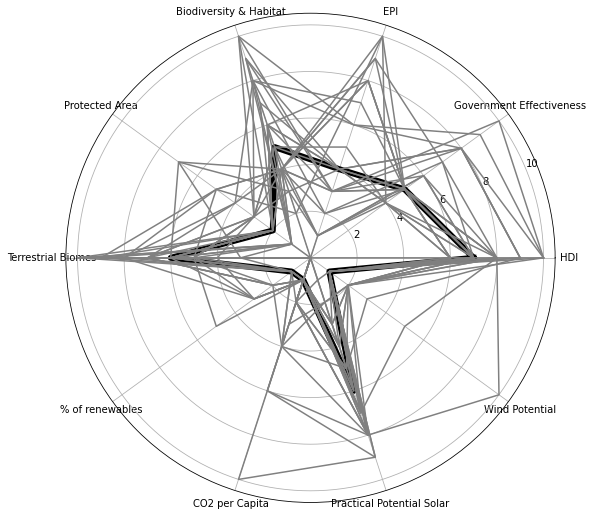

In [31]:
feature = ['HDI','Government Effectiveness','EPI', 'Biodiversity & Habitat','Protected Area','Terrestrial Biomes',
           '% of renewables', 'CO2 per Capita','Practical Potential Solar', 'Wind Potential']

Median_Cluster0 = [7,5,4,5,2,6,1,1,6,1,7]
maximum = [10,10,10,10,7,10,5,10,9,10,10]
minimum = [6,4,1,0,0,3,0,0,1,0,6]

Antigua_and_Barbuda = [7,5,10,2,5,9,0,2,8,1,7]
Argentina = [8,5,8,6,2,6,1,1,7,5,8]
Armenia = [7,5,8,4,2,10,1,1,4,2,7]
Australia = [10,8,6,8,4,8,1,4,8,1,10]
Azerbaijan = [6,4,10,4,1,6,0,1,4,2,6]
Belarus = [8,4,5,5,3,5,1,2,1,1,8]
Canada = [10,9,6,10,3,7,2,4,2,2,10]
Chile = [8,7,2,8,3,4,3,1,8,10,8]
Cuba = [7,4,1,5,3,7,2,1,7,1,7]
Georgia = [7,7,9,4,3,5,3,1,3,2,7]
Israel = [9,8,4,5,1,5,0,2,8,1,9]
Kuwait = [7,5,7,8,1,10,0,6,8,2,7]
Mexico = [7,4,4,6,2,9,1,1,8,1,7]
Mongolia = [6,4,4,7,2,7,0,2,5,2,6]
Montenegro = [8,5,2,4,5,5,5,1,3,2,8]
North_Macedonia = [7,5,9,4,4,7,2,1,4,1,7]
Panama = [7,5,8,4,5,8,3,1,6,1,7]
Qatar = [8,6,3,9,0,6,0,10,9,1,8]
Russia = [8,5,3,10,2,6,0,3,2,2,8]
Saint_Lucia = [6,5,3,4,7,3,1,1,7,1,6]
Saint_Vincent_and_the_Grenadines = [6,5,4,3,7,6,1,1,7,2,6]
Serbia = [7,5,1,3,3,5,2,1,3,1,7]
Seychelles = [7,6,1,0,1,10,0,2,8,1,7]
Singapore = [10,10,3,4,1,3,0,2,5,0,10]
Thailand = [7,6,1,4,2,6,3,1,6,1,7]
Tonga = [6,5,4,6,1,6,0,0,6,1,6]
United_Arab_Emirates = [9,8,4,9,1,9,0,6,9,1,9]
United_States_of_America = [9,8,3,6,2,6,1,4,5,3,9]

# Initialise the spider plot by setting figure size and polar projection
plt.figure(figsize=(15, 9))
plt.subplot(polar=True)

theta = np.linspace(0, 2 * np.pi, len(cluster1))

#Arrange the grid into number of sales equal parts in degrees
lines, labels = plt.thetagrids(range(0, 360, int(360/len(feature))), (feature))

# Plot 1st cluster grap
    
plt.plot(theta,Median_Cluster0,"black", linewidth=6)

#plt.plot(theta,maximum,'green', linewidth = 6)
#plt.plot(theta,minimum,'red', linewidth = 6)

plt.plot(theta,Antigua_and_Barbuda,'grey')
plt.plot(theta,Argentina,'grey')
plt.plot(theta,Armenia,'grey')
plt.plot(theta,Australia,'grey')
plt.plot(theta,Azerbaijan,'grey')
plt.plot(theta,Belarus,'grey')
plt.plot(theta,Canada,'grey')
plt.plot(theta,Chile,'grey')
plt.plot(theta,Cuba,'grey')
plt.plot(theta,Georgia,'grey')
plt.plot(theta,Israel,'grey')
plt.plot(theta,Kuwait,'grey')
plt.plot(theta,Mexico,'grey')
plt.plot(theta,Mongolia,'grey')
plt.plot(theta,Montenegro,'grey')
plt.plot(theta,North_Macedonia,'grey')
plt.plot(theta,Panama,'grey')
plt.plot(theta,Qatar,'grey')
plt.plot(theta,Russia,'grey')
plt.plot(theta,Saint_Lucia,'grey')
plt.plot(theta,Saint_Vincent_and_the_Grenadines,'grey')
plt.plot(theta,Serbia,'grey')
plt.plot(theta,Seychelles,'grey')
plt.plot(theta,Singapore,'grey')
plt.plot(theta,Thailand,'grey')
plt.plot(theta,Tonga,'grey')
plt.plot(theta,United_Arab_Emirates,'grey')
plt.plot(theta,United_States_of_America,'grey')

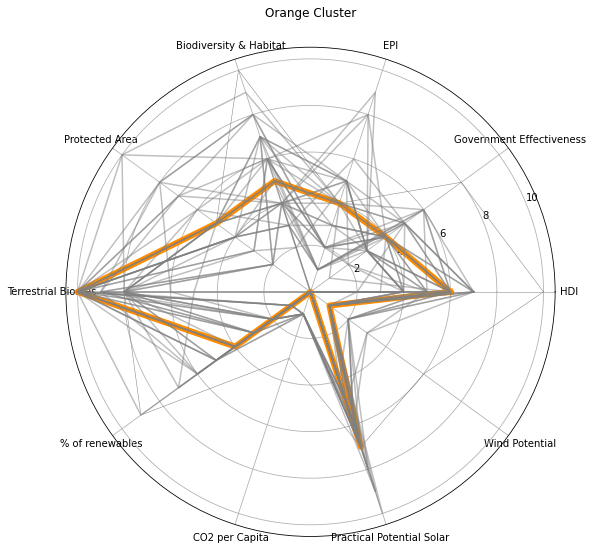

In [32]:
feature = ['HDI','Government Effectiveness','EPI', 'Biodiversity & Habitat','Protected Area','Terrestrial Biomes',
           '% of renewables', 'CO2 per Capita','Practical Potential Solar', 'Wind Potential']
Median_Cluster1 = [6,4,4,5,5,10,4,0,7,1,6]

maximum = [10,8,8,10,10,10,9,3,10,6,10]
minimum = [2,1,1,2,0,5,1,0,4,0,2]

Albania = [7,5,6,3,4,10,4,0,4,2,7]
Bangladesh = [4,3,2,4,0,9,3,0,5,0,4]
Belize = [6,3,5,6,10,10,4,0,7,0,6]
Benin = [3,4,4,5,5,10,5,0,7,0,3]
Bhutan = [5,6,4,5,5,10,9,0,4,1,5]
Bolivia = [6,3,5,7,5,10,1,1,7,1,6]
Botswana = [6,6,2,8,7,10,3,1,9,1,6]
Brazil = [7,4,1,7,5,8,5,1,7,1,7]
Colombia = [7,5,2,6,5,8,3,1,6,1,7]
Costa_Rica = [7,6,1,3,6,10,4,0,6,3,7]
Dominica = [6,4,5,4,8,9,1,1,6,2,6]
Dominican_Republic = [6,4,3,3,4,10,2,1,7,1,6]
Ecuador = [6,4,3,4,5,8,2,1,5,1,6]
Equatorial_Guinea = [4,2,5,7,4,10,1,1,5,0,4]
Ghana = [4,4,8,4,4,8,5,0,7,0,4]
Guatemala = [5,3,1,4,5,5,7,0,7,1,5]
Guyana = [5,4,2,8,8,6,2,1,7,0,5]
Honduras = [4,3,5,4,5,8,6,0,7,1,4]
Iceland = [10,8,4,10,5,8,9,3,7,6,10]
Indonesia = [6,5,4,7,2,8,2,1,5,0,6]
Jamaica = [6,6,1,3,4,10,1,1,7,1,6]
Kiribati = [4,4,2,6,0,10,5,0,9,0,4]
Laos = [4,3,8,6,3,10,5,1,5,1,4]
Morocco = [5,4,4,5,5,10,1,0,8,2,5]
Namibia = [4,5,5,8,8,10,3,0,10,1,4]
Nicaragua = [5,3,9,4,7,9,6,0,6,2,5]
Paraguay = [6,4,3,7,2,8,7,0,7,1,6]
Peru = [7,5,1,6,6,8,3,0,7,1,7]
Philippines = [6,5,4,4,2,9,3,0,6,2,6]
Sao_Tome_and_Principe = [4,3,5,2,3,10,4,0,5,0,4]
Senegal = [2,5,1,5,4,10,4,0,8,1,2]
Sri_Lanka = [7,4,2,4,4,10,6,0,7,2,7]
Suriname = [6,3,4,9,10,8,2,1,7,0,6]
Tajikistan = [5,2,2,6,3,8,4,0,5,3,5]
Timor_Leste = [4,3,3,4,2,9,2,0,7,1,4]
Venezuela = [6,1,4,6,7,10,2,1,7,1,6]


# Initialise the spider plot by setting figure size and polar projection
plt.figure(figsize=(15, 9))
plt.subplot(polar=True)

theta = np.linspace(0, 2 * np.pi, len(cluster1))

#Arrange the grid into number of sales equal parts in degrees
lines, labels = plt.thetagrids(range(0, 360, int(360/len(feature))), (feature))

# Plot 2nd cluster graph
plt.plot(theta, Median_Cluster1,'darkorange',linewidth=6)

#plt.plot(theta,maximum,'green', linewidth = 6)
#plt.plot(theta,minimum,'red', linewidth = 6)

plt.plot(theta,Albania,'grey',alpha=0.5)
plt.plot(theta,Bangladesh,'grey',alpha=0.5)
plt.plot(theta,Belize,'grey',alpha=0.5)
plt.plot(theta,Benin,'grey',alpha=0.5)
plt.plot(theta,Bhutan,'grey',alpha=0.5)
plt.plot(theta,Bolivia,'grey',alpha=0.5)
plt.plot(theta,Botswana,'grey',alpha=0.5)
plt.plot(theta,Brazil,'grey',alpha=0.5)
plt.plot(theta,Colombia,'grey',alpha=0.5)
plt.plot(theta,Costa_Rica,'grey',alpha=0.5)
plt.plot(theta,Dominica,'grey',alpha=0.5)
plt.plot(theta,Dominican_Republic,'grey',alpha=0.5)
plt.plot(theta,Ecuador,'grey',alpha=0.5)
plt.plot(theta,Equatorial_Guinea,'grey',alpha=0.5)
plt.plot(theta,Ghana,'grey',alpha=0.5)
plt.plot(theta,Guatemala,'grey',alpha=0.5)
plt.plot(theta,Guyana,'grey',alpha=0.5)
plt.plot(theta,Honduras,'grey',alpha=0.5)
plt.plot(theta,Iceland,'grey',linewidth = 0.5)
plt.plot(theta,Indonesia,'grey',alpha=0.5)
plt.plot(theta,Jamaica,'grey',alpha=0.5)
plt.plot(theta,Kiribati,'grey',alpha=0.5)
plt.plot(theta,Laos,'grey',alpha=0.5)
plt.plot(theta,Morocco,'grey',alpha=0.5)
plt.plot(theta,Namibia,'grey',alpha=0.5)
plt.plot(theta,Nicaragua,'grey',alpha=0.5)
plt.plot(theta,Paraguay,'grey',alpha=0.5)
plt.plot(theta,Peru,'grey',alpha=0.5)
plt.plot(theta,Philippines,'grey',alpha=0.5)
plt.plot(theta,Sao_Tome_and_Principe,'grey',alpha=0.5)
plt.plot(theta,Senegal,'grey',alpha=0.5)
plt.plot(theta,Sri_Lanka,'grey',alpha=0.5)
plt.plot(theta,Suriname,'grey',alpha=0.5)
plt.plot(theta,Tajikistan,'grey',alpha=0.5)
plt.plot(theta,Timor_Leste,'grey',alpha=0.5)
plt.plot(theta,Venezuela,'grey',alpha=0.5)

# Add legend and title for the plot
#plt.legend(labels=('cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6'), loc=9)
plt.title("Orange Cluster")

plt.savefig('Orange_Cluster.png')
# Dsiplay the plot on the screen
plt.show()


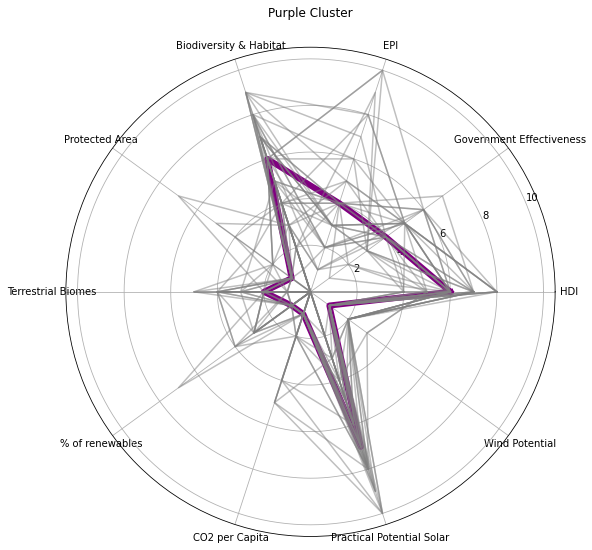

In [33]:
feature = ['HDI','Government Effectiveness','EPI', 'Biodiversity & Habitat','Protected Area','Terrestrial Biomes',
           '% of renewables', 'CO2 per Capita','Practical Potential Solar', 'Wind Potential']
Median_Cluster2 = [6,4,4,6,1,2,1,1,7,1,6]

Algeria = [6,4,7,9,1,5,0,1,9,2,6]
Bahrain = [8,5,2,8,0,1,0,5,8,1,8]
Barbados = [7,6,1,3,5,0,1,1,8,1,7]
Bosnia_and_Herzegovina = [7,3,3,4,4,1,4,2,3,2,7]
Cabo_Verde = [5,5,8,4,0,2,3,0,8,3,5]
China = [7,6,2,6,2,1,1,2,4,2,7]
Egypt = [6,4,3,9,1,4,1,1,10,2,6]
El_Salvador = [5,4,4,4,3,4,3,0,9,1,5]
Fiji = [6,5,3,8,1,1,3,1,5,1,6]
Grenada = [7,4,1,3,7,2,1,1,7,1,7]
India = [4,5,5,4,1,4,4,1,7,1,4]
Iran = [7,3,3,7,1,4,0,2,8,2,7]
Iraq = [5,2,1,8,0,5,0,1,8,1,5]
Jordan = [6,5,2,8,1,1,1,1,9,1,6]
Kazakhstan = [8,5,3,7,0,2,0,5,3,2,8]
Kyrgyzstan = [5,3,10,6,2,2,3,0,4,3,5]
Lebanon = [6,3,9,2,1,2,1,1,7,1,6]
Maldives = [6,4,2,1,1,0,0,1,8,0,6]
Marshall_Islands = [6,1,4,5,1,1,1,1,7,1,6]
Mauritius = [7,7,4,2,1,3,1,1,6,2,7]
Micronesia = [4,4,2,5,0,0,1,0,6,1,4]
Moldova = [6,4,5,3,1,2,3,0,3,1,6]
Oman = [7,5,8,9,0,1,0,4,10,2,7]
Samoa = [6,6,4,7,0,4,4,0,6,0,6]
Saudi_Arabia = [8,5,5,9,1,3,0,5,10,1,8]
South_Africa = [6,6,10,6,2,5,1,2,8,2,6]
Tunisia = [6,5,6,6,0,4,1,1,7,2,6]
Turkey = [8,5,4,4,1,0,1,1,5,1,8]
Turkmenistan = [6,2,4,7,0,2,0,4,6,2,6]
Ukraine = [7,4,4,3,2,3,1,1,2,1,7]
Uruguay = [8,6,4,5,1,2,7,1,6,1,8]
Uzbekistan = [6,4,3,7,0,4,0,1,5,2,6]
Vanuatu = [4,3,6,8,1,2,3,0,5,1,4]
Viet_Nam = [6,5,3,5,3,3,3,1,4,1,6]

# Initialise the spider plot by setting figure size and polar projection
plt.figure(figsize=(15, 9))
plt.subplot(polar=True)

theta = np.linspace(0, 2 * np.pi, len(cluster1))

#Arrange the grid into number of sales equal parts in degrees
lines, labels = plt.thetagrids(range(0, 360, int(360/len(feature))), (feature))

# Plot 2nd cluster graph
plt.plot(theta, Median_Cluster2,'purple', linewidth=6)

plt.plot(theta,Algeria,'grey',alpha=0.5)
plt.plot(theta,Bahrain,'grey',alpha=0.5)
plt.plot(theta,Barbados,'grey',alpha=0.5)
plt.plot(theta,Bosnia_and_Herzegovina,'grey',alpha=0.5)
plt.plot(theta,Cabo_Verde,'grey',alpha=0.5)
plt.plot(theta,China,'grey',alpha=0.5)
plt.plot(theta,Egypt,'grey',alpha=0.5)
plt.plot(theta,El_Salvador,'grey',alpha=0.5)
plt.plot(theta,Fiji,'grey',alpha=0.5)
plt.plot(theta,Grenada,'grey',alpha=0.5)
plt.plot(theta,India,'grey',alpha=0.5)
plt.plot(theta,Iran,'grey',alpha=0.5)
plt.plot(theta,Iraq,'grey',alpha=0.5)
plt.plot(theta,Jordan,'grey',alpha=0.5)
plt.plot(theta,Kazakhstan,'grey',alpha=0.5)
plt.plot(theta,Kyrgyzstan,'grey',alpha=0.5)
plt.plot(theta,Lebanon,'grey',alpha=0.5)
plt.plot(theta,Maldives,'grey',alpha=0.5)
plt.plot(theta,Marshall_Islands,'grey',alpha=0.5)
plt.plot(theta,Mauritius,'grey',alpha=0.5)
plt.plot(theta,Micronesia,'grey',alpha=0.5)
plt.plot(theta,Moldova,'grey',alpha=0.5)
plt.plot(theta,Oman,'grey',alpha=0.5)
plt.plot(theta,Samoa,'grey',alpha=0.5)
plt.plot(theta,Saudi_Arabia,'grey',alpha=0.5)
plt.plot(theta,South_Africa,'grey',alpha=0.5)
plt.plot(theta,Tunisia,'grey',alpha=0.5)
plt.plot(theta,Turkey,'grey',alpha=0.5)
plt.plot(theta,Turkmenistan,'grey',alpha=0.5)
plt.plot(theta,Ukraine,'grey',alpha=0.5)
plt.plot(theta,Uruguay,'grey',alpha=0.5)
plt.plot(theta,Uzbekistan,'grey',alpha=0.5)
plt.plot(theta,Vanuatu,'grey',alpha=0.5)
plt.plot(theta,Viet_Nam,'grey',alpha=0.5)

# Add legend and title for the plot
#plt.legend(labels=('cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6'), loc=9)
plt.title("Purple Cluster")
 
plt.savefig('Purple_Cluster.png')
# Dsiplay the plot on the screen
plt.show()


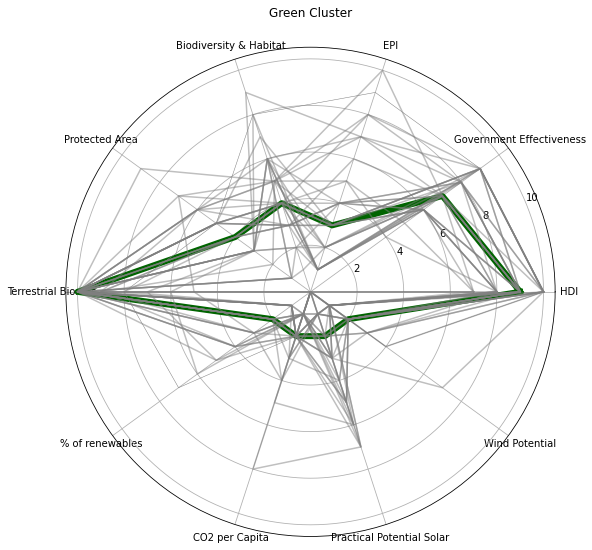

In [34]:
feature = ['HDI','Government Effectiveness','EPI', 'Biodiversity & Habitat','Protected Area','Terrestrial Biomes',
           '% of renewables', 'CO2 per Capita','Practical Potential Solar', 'Wind Potential']
Median_Cluster3 = [9,7,3,4,4,10,2,2,2,2,9]

Austria = [9,8,8,5,6,10,4,2,2,3,9]
Bahamas = [7,6,3,7,5,10,0,1,7,1,7]
Belgium = [10,7,4,3,6,10,1,2,1,2,10]
Brunei_Darussalam = [8,8,1,6,1,10,0,5,6,0,8]
Bulgaria = [8,6,1,4,4,10,2,2,3,1,8]
Croatia = [8,6,3,3,5,10,4,1,3,3,8]
Cyprus = [9,7,2,2,1,10,1,2,7,1,9]
Czech_Republic = [9,7,1,4,5,10,2,3,1,1,9]
Denmark = [10,9,3,4,4,9,4,2,1,2,10]
Estonia = [9,8,4,6,3,10,3,4,0,2,9]
Finland = [10,9,7,9,3,7,5,2,0,1,10]
France = [9,8,4,3,5,10,2,1,2,2,9]
Germany = [10,9,8,4,6,10,2,2,1,2,10]
Greece = [9,6,1,2,3,10,2,2,5,2,9]
Hungary = [8,6,4,2,3,10,2,1,3,1,8]
Ireland = [10,8,2,4,4,8,1,2,0,3,10]
Italy = [9,6,1,3,4,10,2,1,4,2,9]
Japan = [9,9,2,6,3,10,1,2,3,2,9]
Latvia = [8,7,7,6,3,10,5,1,1,1,8]
Lithuania = [9,7,10,5,3,10,4,1,1,1,9]
Luxembourg = [9,9,3,4,7,10,2,4,1,1,9]
Malaysia = [7,7,1,6,1,10,1,2,6,0,7]
Malta = [9,7,2,1,1,10,1,1,6,1,9]
Netherlands = [10,9,3,3,4,9,1,3,1,2,10]
New_Zealand = [10,9,1,6,6,9,3,2,3,7,10]
Norway = [10,9,9,8,5,8,7,2,0,4,10]
Poland = [9,6,4,4,5,10,1,2,1,1,9]
Portugal = [8,7,4,3,4,10,3,1,5,2,8]
Romania = [8,4,5,4,4,10,3,1,3,1,8]
Slovakia = [8,6,3,4,5,10,1,2,2,1,8]
Slovenia = [9,7,2,5,6,10,2,2,2,2,9]
South_Korea = [9,8,7,5,2,9,0,3,4,2,9]
Spain = [9,7,6,3,5,10,2,2,5,2,9]
Sweden = [10,9,1,8,3,6,6,1,0,2,10]
Switzerland = [10,9,3,5,7,5,3,1,2,3,10]
Trinidad_and_Tobago = [7,5,5,5,9,10,0,8,7,0,7]
United_Kingdom = [10,8,3,4,5,10,1,1,0,4,10]

# Initialise the spider plot by setting figure size and polar projection
plt.figure(figsize=(15, 9))
plt.subplot(polar=True)

theta = np.linspace(0, 2 * np.pi, len(cluster1))

#Arrange the grid into number of sales equal parts in degrees
lines, labels = plt.thetagrids(range(0, 360, int(360/len(feature))), (feature))

# Plot 1st cluster graph
plt.plot(theta, Median_Cluster3,'darkgreen',linewidth=6)

plt.plot(theta,Austria,'grey',alpha=0.5)
plt.plot(theta,Bahamas,'grey',alpha=0.5)
plt.plot(theta,Belgium,'grey',alpha=0.5)
plt.plot(theta,Brunei_Darussalam,'grey',alpha=0.5)
plt.plot(theta,Bulgaria,'grey',alpha=0.5)
plt.plot(theta,Croatia,'grey',alpha=0.5)
plt.plot(theta,Cyprus,'grey',alpha=0.5)
plt.plot(theta,Czech_Republic,'grey',alpha=0.5)
plt.plot(theta,Denmark,'grey',alpha=0.5)
plt.plot(theta,Estonia,'grey',alpha=0.5)
plt.plot(theta,Finland,'grey',alpha=0.5)
plt.plot(theta,France,'grey',alpha=0.5)
plt.plot(theta,Germany,'grey',alpha=0.5)
plt.plot(theta,Greece,'grey',alpha=0.5)
plt.plot(theta,Hungary,'grey',alpha=0.5)
plt.plot(theta,Ireland,'grey',alpha=0.5)
plt.plot(theta,Italy,'grey',alpha=0.5)
plt.plot(theta,Japan,'grey',alpha=0.5)
plt.plot(theta,Latvia,'grey',alpha=0.5)
plt.plot(theta,Lithuania,'grey',alpha=0.5)
plt.plot(theta,Luxembourg,'grey',alpha=0.5)
plt.plot(theta,Malaysia,'grey',alpha=0.5)
plt.plot(theta,Malta,'grey',alpha=0.5)
plt.plot(theta,Netherlands,'grey',alpha=0.5)
plt.plot(theta,New_Zealand,'grey',alpha=0.5)
plt.plot(theta,Norway,'grey',linewidth = 0.5)
plt.plot(theta,Poland,'grey',alpha=0.5)
plt.plot(theta,Portugal,'grey',alpha=0.5)
plt.plot(theta,Romania,'grey',alpha=0.5)
plt.plot(theta,Slovakia,'grey',alpha=0.5)
plt.plot(theta,Slovenia,'grey',alpha=0.5)
plt.plot(theta,South_Korea,'grey',alpha=0.5)
plt.plot(theta,Spain,'grey',alpha=0.5)
plt.plot(theta,Sweden,'grey',alpha=0.5)
plt.plot(theta,Switzerland,'grey',alpha=0.5)
plt.plot(theta,Trinidad_and_Tobago,'grey',alpha=0.5)
plt.plot(theta,United_Kingdom,'grey',alpha=0.5)

# Add legend and title for the plot
#plt.legend(labels=('cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6'), loc=9)
plt.title("Green Cluster")

plt.savefig('Green_Cluster.png')
# Dsiplay the plot on the screen
plt.show()

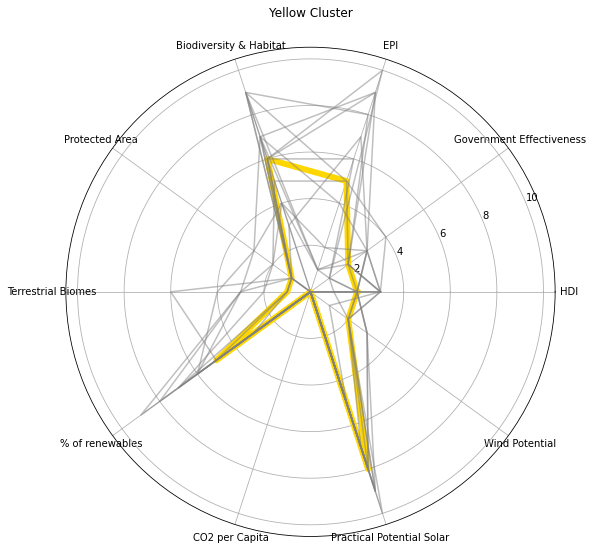

In [35]:
feature = ['HDI','Government Effectiveness','EPI', 'Biodiversity & Habitat','Protected Area','Terrestrial Biomes',
           '% of renewables', 'CO2 per Capita','Practical Potential Solar', 'Wind Potential']
Median_Cluster4 = [2,2,5,6,1,1,5,0,8,2,2]

Afghanistan = [2,1,10,6,1,0,2,0,8,3,2]
Angola = [3,2,9,7,3,4,6,0,8,0,3]
Djibouti = [2,3,4,7,1,1,3,0,9,3,2]
Eritrea = [1,1,6,6,1,3,8,0,9,2,1]
Gambia = [2,3,2,4,3,3,6,0,8,0,2]
Lesotho = [2,3,7,3,1,0,4,0,8,3,2]
Madagascar = [2,2,1,4,2,3,9,0,8,2,2]
Mauritania = [3,4,5,9,0,0,3,0,9,2,3]
Myanmar = [3,2,5,5,2,2,7,0,6,0,3]
Pakistan = [3,3,9,6,1,6,5,0,7,2,3]
Papua_New_Guinea = [3,3,1,9,1,1,5,0,5,0,3]
Solomon_Islands = [3,2,8,9,1,0,5,0,5,1,3]
Sudan = [2,1,1,7,1,1,7,0,10,2,2]

# Initialise the spider plot by setting figure size and polar projection
plt.figure(figsize=(15, 9))
plt.subplot(polar=True)

theta = np.linspace(0, 2 * np.pi, len(cluster1))

#Arrange the grid into number of sales equal parts in degrees
lines, labels = plt.thetagrids(range(0, 360, int(360/len(feature))), (feature))

# Plot 2nd cluster graph
plt.plot(theta, Median_Cluster4,'gold', linewidth= 6)

plt.plot(theta,Afghanistan,'grey',alpha=0.5)
plt.plot(theta,Angola,'grey',alpha=0.5)
plt.plot(theta,Djibouti,'grey',alpha=0.5)
plt.plot(theta,Eritrea,'grey',alpha=0.5)
plt.plot(theta,Gambia,'grey',alpha=0.5)
plt.plot(theta,Lesotho,'grey',alpha=0.5)
plt.plot(theta,Madagascar,'grey',alpha=0.5)
plt.plot(theta,Mauritania,'grey',alpha=0.5)
plt.plot(theta,Myanmar,'grey',alpha=0.5)
plt.plot(theta,Pakistan,'grey',alpha=0.5)
plt.plot(theta,Papua_New_Guinea,'grey',alpha=0.5)
plt.plot(theta,Solomon_Islands,'grey',alpha=0.5)
plt.plot(theta,Sudan,'grey',alpha=0.5)

# Add legend and title for the plot
#plt.legend(labels=('cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6'), loc=9)
plt.title("Yellow Cluster")
 
plt.savefig('Yellow_Cluster.png')
# Dsiplay the plot on the screen
plt.show()

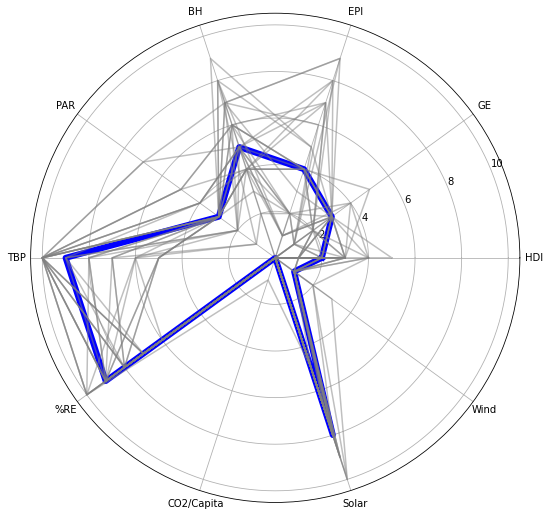

In [36]:
feature = ['HDI','GE','EPI', 'BH','PAR','TBP',
           '%RE', 'CO2/Capita','Solar', 'Wind']
Median_cluster5 = [2,3,4,5,3,9,9,0,8,1,2]

Burkina_Faso = [1,3,8,5,4,9,7,0,8,1,1]
Burundi = [1,2,8,4,3,5,9,0,7,0,1]
Cambodia = [4,3,7,4,3,10,7,0,7,1,4]
Cameroon = [3,3,9,7,3,7,9,0,7,0,3]
Central_African_Republic = [0,1,6,7,3,10,9,0,8,0,0]
Chad = [0,1,9,7,2,8,9,0,10,3,0]
Comoros = [3,1,2,2,1,6,6,0,7,0,3]
Cote_D_Ivoire = [3,4,1,4,5,10,7,0,7,0,3]
Ethiopia = [2,3,4,6,3,8,10,0,9,1,2]
Gabon = [5,3,1,8,3,10,10,1,5,0,5]
Guinea = [1,3,2,5,2,9,8,0,8,0,1]
Guinea_Bissau = [2,1,2,5,3,10,10,0,8,0,2]
Haiti = [2,0,2,3,3,5,8,0,8,1,2]
Kenya = [4,4,2,6,3,7,8,0,8,2,4]
Liberia = [2,2,7,6,2,6,10,0,6,0,2]
Malawi = [2,3,1,5,4,10,8,0,8,1,2]
Mali = [1,2,0,8,1,7,8,0,9,1,1]
Mozambique = [1,3,4,6,5,10,7,0,7,1,1]
Nepal = [4,2,4,4,3,5,8,0,5,1,4]
Niger = [0,3,5,9,3,8,9,0,10,2,0]
Nigeria = [3,2,7,5,3,6,9,0,8,1,3]
Republic_of_Congo = [2,1,5,8,3,10,8,0,6,0,2]
Rwanda = [3,5,4,4,3,5,9,0,7,0,3]
Sierra_Leone = [1,2,2,4,2,9,9,0,7,0,1]
Tanzania = [2,3,1,5,7,10,9,0,8,1,2]
Togo = [2,3,4,4,4,10,8,0,7,0,2]
Uganda = [3,3,4,5,4,10,10,0,8,0,3]
Zambia = [3,3,3,7,7,10,9,0,9,1,3]
Zimbabwe = [3,2,4,6,5,10,9,0,8,1,3]

# Initialise the spider plot by setting figure size and polar projection
plt.figure(figsize=(15, 9))
plt.subplot(polar=True)

theta = np.linspace(0, 2 * np.pi, len(cluster1))

#Arrange the grid into number of sales equal parts in degrees
lines, labels = plt.thetagrids(range(0, 360, int(360/len(feature))), (feature))


# Plot 2nd cluster graph
plt.plot(theta, Median_cluster5,'blue', linewidth = 6) 

plt.plot(theta,Burkina_Faso,'grey',alpha=0.5)
plt.plot(theta,Burundi,'grey',alpha=0.5)
plt.plot(theta,Cambodia,'grey',alpha=0.5)
plt.plot(theta,Cameroon,'grey',alpha=0.5)
plt.plot(theta,Central_African_Republic,'grey',alpha=0.5)
plt.plot(theta,Chad,'grey',alpha=0.5)
plt.plot(theta,Comoros,'grey',alpha=0.5)
plt.plot(theta,Cote_D_Ivoire,'grey',alpha=0.5)
plt.plot(theta,Ethiopia,'grey',alpha=0.5)
plt.plot(theta,Gabon,'grey',alpha=0.5)
plt.plot(theta,Guinea,'grey',alpha=0.5)
plt.plot(theta,Guinea_Bissau,'grey',alpha=0.5)
plt.plot(theta,Haiti,'grey',alpha=0.5)
plt.plot(theta,Kenya,'grey',alpha=0.5)
plt.plot(theta,Liberia,'grey',alpha=0.5)
plt.plot(theta,Malawi,'grey',alpha=0.5)
plt.plot(theta,Mali,'grey',alpha=0.5)
plt.plot(theta,Mozambique,'grey',alpha=0.5)
plt.plot(theta,Nepal,'grey',alpha=0.5)
plt.plot(theta,Niger,'grey',alpha=0.5)
plt.plot(theta,Nigeria,'grey',alpha=0.5)
plt.plot(theta,Republic_of_Congo,'grey',alpha=0.5)
plt.plot(theta,Rwanda,'grey',alpha=0.5)
plt.plot(theta,Sierra_Leone,'grey',alpha=0.5)
plt.plot(theta,Tanzania,'grey',alpha=0.5)
plt.plot(theta,Togo,'grey',alpha=0.5)
plt.plot(theta,Uganda,'grey',alpha=0.5)
plt.plot(theta,Zambia,'grey',alpha=0.5)
plt.plot(theta,Zimbabwe,'grey',alpha=0.5)

# Add legend and title for the plot
#plt.legend(labels=('cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6'), loc=9)
#plt.title("Blue Cluster")
 
plt.savefig('Blue_Cluster.png')
# Dsiplay the plot on the screen
plt.show()
